# Milan Bansal
# Roll no: 214102318

# $$ \color{red} { \text{ASSIGNMENT : 4} }$$

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Q1.)
#### Consider the discrete time periodic signal of period N = 20 as given below:
$$ x[n] =\begin{cases} 
    1 & \text{-2 $\leq$ $n$ $\leq 2$ }\\ 
    0 & \text{otherwise}\\ 
    \end{cases} $$
#### where n is the discrete time sequence
#### (a) Plot the sequence x[n] for 4 time periods
#### (b) Determine and plot the magnitude, |ck| and phase coefficients, ∠ck of discrete time Fourier series (DTFS) of x[n].

##### Discrete Time fourier Series (DTFS) is given by:
$$ x[n] = \sum_{k=0}^{N-1} C_{k}e^{jwn} $$
##### and 
$$ C_{K} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]e^{-jkwn} $$

## a)

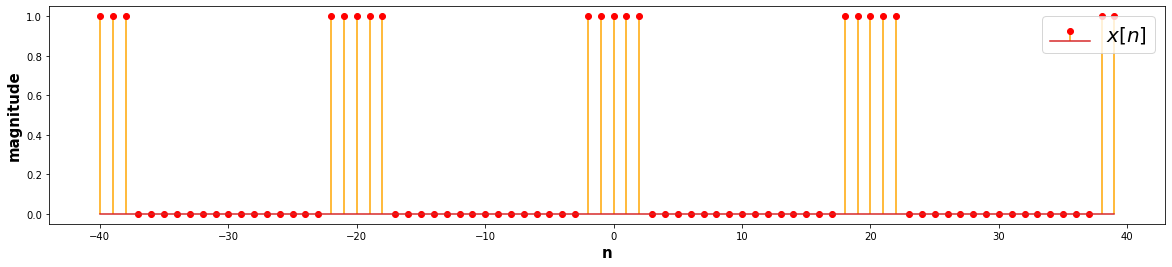

In [2]:
pi = np.pi 
q1_per = 20


q1_n = np.arange(-40,40) # time axis

q1_sig = np.zeros(len(q1_n)) # zero array to store the signal

for i in range(len(q1_n)): # getting the required signal
    if q1_n[i]%20==0:
        q1_sig[i-2] = 1
        q1_sig[i-1] = 1
        q1_sig[i] = 1
        q1_sig[i+1] = 1
        q1_sig[i+2] = 1
        
#plotting
figq1a = plt.figure(figsize = (20,4))
plt.stem(q1_n, q1_sig, 'orange', markerfmt = 'ro', label = r'$x[n]$')
plt.xlabel('n', size = 15, weight = 'bold')
plt.ylabel('magnitude',  size = 15, weight = 'bold')
plt.legend(prop={'size': 20})
plt.show()

## b)

In [3]:
def dtfs_coeff(x): # function to calc DTFS coeff

    dtfs= (1/len(x)) * np.fft.fftshift(np.fft.fft(x))
    mag = np.abs(dtfs)
    phase = np.arctan2(np.imag(dtfs),np.real(dtfs)) 
    return dtfs,mag,phase

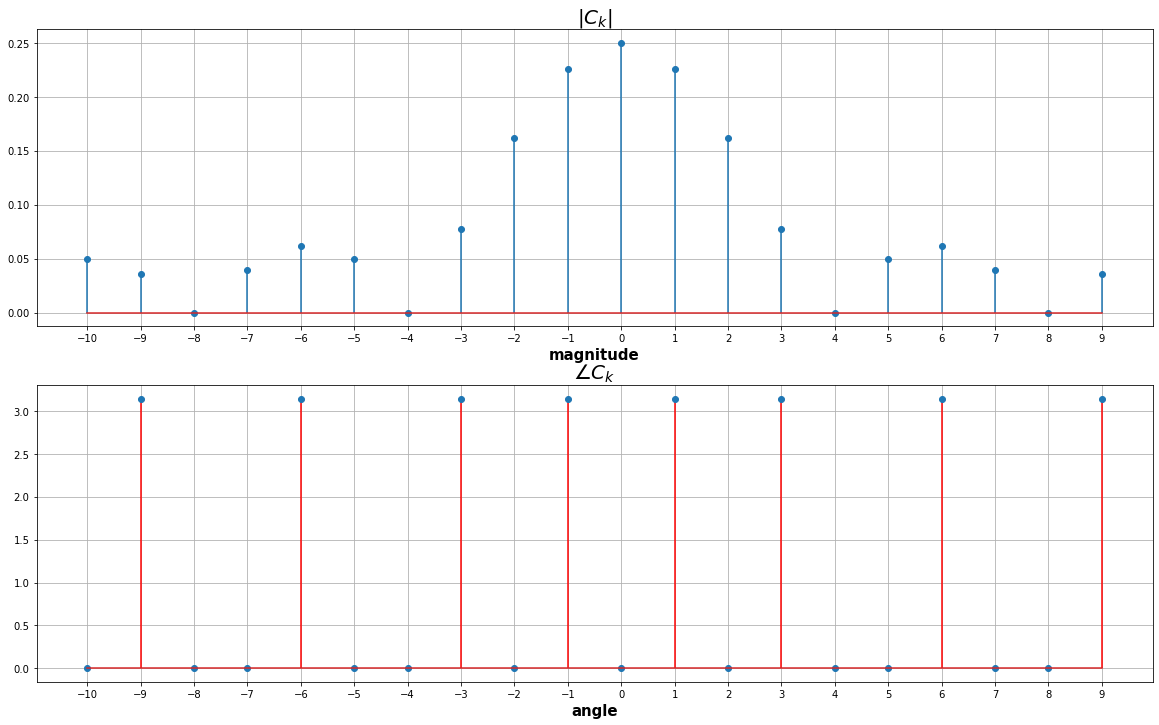

In [4]:
q1b_sig = np.zeros(20) # zero array
q1b_n = np.arange(-10,10) # time axis

for i in range(len(q1b_n)): # etting one cycle of the signal above
    if q1b_n[i]%20==0:
        q1b_sig[i-2] = 1
        q1b_sig[i-1] = 1
        q1b_sig[i] = 1
        q1b_sig[i+1] = 1
        q1b_sig[i+2] = 1

q1_k = np.arange(-10,10) # values of k

q1b_dtfs, ck_mag, ck_phs = dtfs_coeff(q1b_sig) # getting coeff, magnitude and phs

#plotting

figq1b  = plt.figure(figsize = (20,12))

axq1 = figq1b.add_subplot(211)
axq1.stem(q1b_n, ck_mag)
axq1.set_title(r'$|C_k|$', size = 20, weight = 'bold')
axq1.set_xlabel('n', size = 15, weight = 'bold')
axq1.set_xlabel('magnitude', size = 15, weight = 'bold')
axq1.set_xticks(q1b_n)
plt.grid()

axq2 = figq1b.add_subplot(212)
axq2.stem(q1b_n, ck_phs,'r')
axq2.set_title(r'$\angle C_k$', size = 20, weight = 'bold')
axq2.set_xlabel('n', size = 15, weight = 'bold')
axq2.set_xlabel('angle', size = 15, weight = 'bold')
axq2.set_xticks(q1b_n)
plt.grid()

# Q2.)
#### For x[n] in Question 1, the reconstructed signal is given by
$$ \hat x[n] = \sum_{k=-M}^{M} c_{k}e^{jk(2\pi/N)n} $$
#### (a) Reconstruct x[n] from 4 DTFS coefficients (i.e., M = 2) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).
#### (b) Reconstruct x[n] from 10 DTFS coefficients (i.e., M = 5) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).

<ipython-input-5-f8bf99319ce2>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(N,dtype = np.complex)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return ar

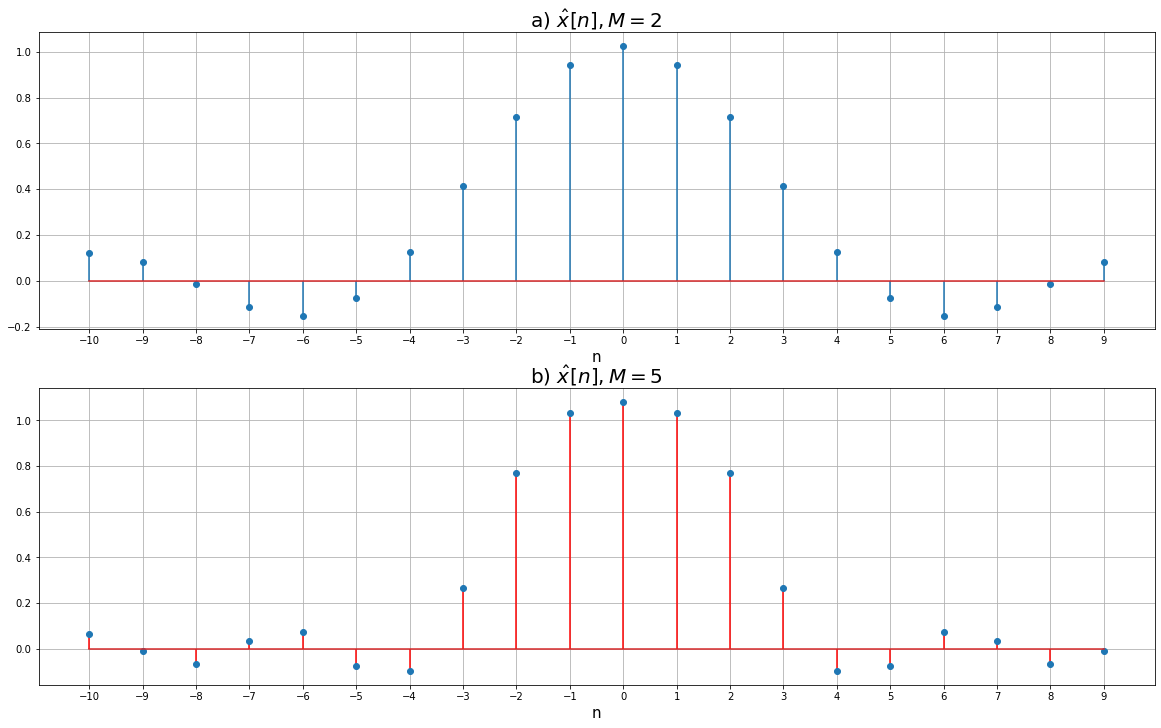

In [5]:
def recons(M,dtfs): # function to reconstruct the signall from dtfs coeff
    rnge = np.arange(-10,10)
    N = len(dtfs)
    x = np.zeros(N,dtype = np.complex)
    K = np.where(np.abs(rnge) <= M)   
    for n in  rnge: 
        for k in K[0]:
            x[np.where(rnge == n)] = x[np.where(rnge == n)] + (dtfs[k] * np.exp(rnge[k]* n * 2 * 1j * pi / N))      
    return np.fft.fftshift(x)

# getting reconstructed signal
q2a_recon2 = recons(2,q1b_dtfs) 
q2b_recon5 = recons(5,q1b_dtfs)

#plotting

figq2 = plt.figure(figsize = (20,12))

figq2.add_subplot(211)
plt.stem(q1b_n , q2a_recon2)
plt.xlabel('n' , size = 15 )
plt.title('a) $ \hat x[n] ,  M = 2$' , size = 20)
plt.xticks(q1b_n)
plt.grid()


figq2.add_subplot(212)
plt.stem(q1b_n , q2b_recon5, 'r')
plt.xlabel('n' , size = 15 )
plt.title('b) $ \hat x[n] ,  M = 5$' , size = 20)
plt.xticks(q1b_n)
plt.grid()
plt.show()

# Q3.)
#### In the context of discrete time Fourier series, for a discrete time signal x[n], the Parseval’s relation is given by
$$ \frac{1}{N} \sum_{n=<N>} |x[n]|^{2} = \sum_{k=<N>} |c_{k}|^{2}$$
#### (a) If x[n] = 1+ sin (2πn/N)+3 cos (2πn/N) (with time period, N = 8), plot x[n] and the magnitude of DTFS coefficients of x[n].
#### (b) Verify the Parseval’s relation for x[n].

## a)

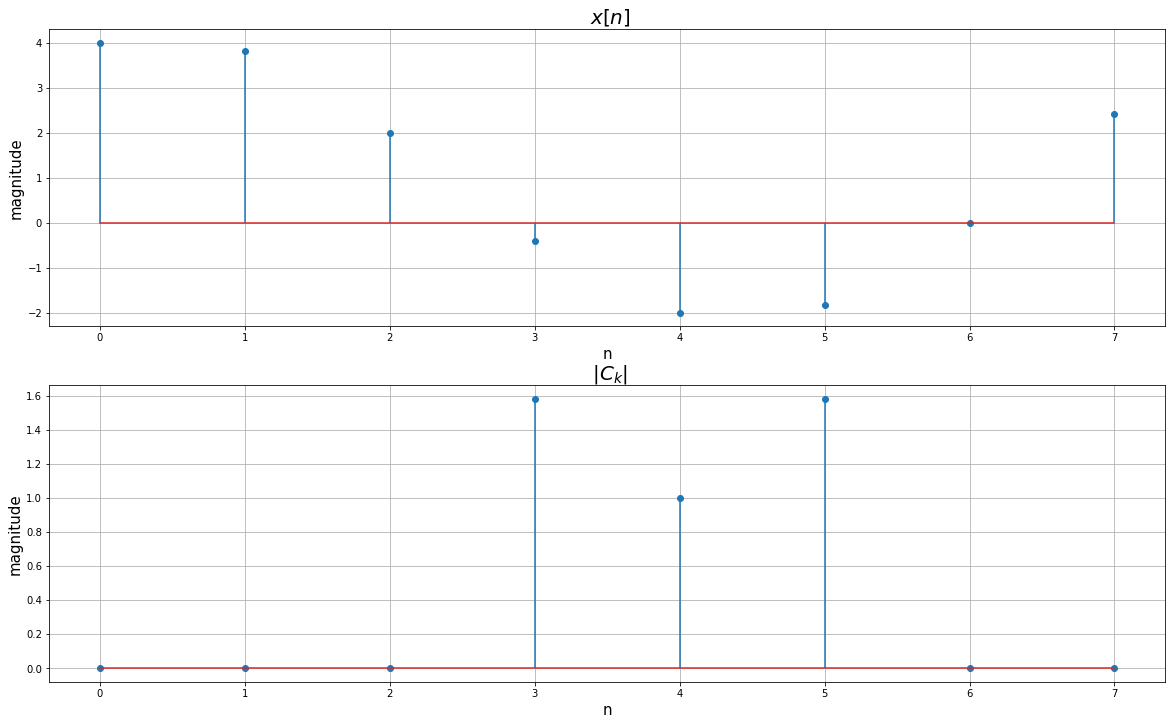

In [6]:
N = 8
q3_n = np.arange(N) 

q3_x = np.zeros(N) # zero array for storing the signal

for i in range(N):
    q3_x[i] = 1 + 3 * np.cos(2*pi*i/N) + np.sin(2*pi*i/N) # given signal
    

    
q3_mag = dtfs_coeff(q3_x)[1]    # getting dtfs coeff magnitude

#plotting

figq3 = plt.figure(figsize = (20,12))

figq3.add_subplot(211)
plt.stem(q3_n , q3_x)
plt.xlabel('n' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(' $ x[n]$' , size = 20)
plt.xticks(q3_n)
plt.grid()
    
figq3.add_subplot(212)
plt.stem(q3_n , q3_mag)
plt.xlabel('n' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(' $ |C_k|$' , size = 20)
plt.xticks(q3_n)
plt.grid()    

## b)

In [7]:
# verifying parseval's relation

q3b_pow1 = np.sum(q3_x**2)/N
q3b_pow2 = np.sum(q3_mag**2)

print(f'LHS = {q3b_pow1}')
print(f'RHS = {q3b_pow2}')
print(f"Since LHS = RHS, Hence Parseval's relation is verified.")

LHS = 6.0
RHS = 6.0
Since LHS = RHS, Hence Parseval's relation is verified.


# Q4.) 
### Compute the Fourier transform X$(e^{jω}$) of the signal x[n] shown in Fig. 1 and plot its magnitude and phase over the interval ω ∈ [−π, π].

In [8]:
def dtft(f,x): # function to calculate DTFT
    xw = np.arange(-pi,pi,0.001) # w axis for DTFT
    FT_real = np.zeros_like(xw) # initial array for real part
    FT_imag = np.zeros_like(xw) # initial array for imag part
    
    for i in range(len(xw)): # performing summation to get real and imag part of DTFT
        FT_real[i] = np.sum(f * np.cos(- xw[i] * x)) 
        FT_imag[i] = np.sum(f * np.sin(- xw[i] * x)) 
        
        # returns w axis, real part, imag part, and modulus
    return xw, FT_real, FT_imag, np.sqrt(FT_real**2 + FT_imag**2 )

def i_dtft(x_w, xn ): # function to calculate idtft
    xw = np.arange(-pi,pi,0.001) # w axis
    
    x_n = np.zeros(len(xn)) # zero array to store signal
    
    for i in range(len(xn)):
        x_n[i] = np.sum(x_w * np.exp(1j * xw * xn[i])) /(2*pi) * 0.001
        
    return x_n
        
    
    
    

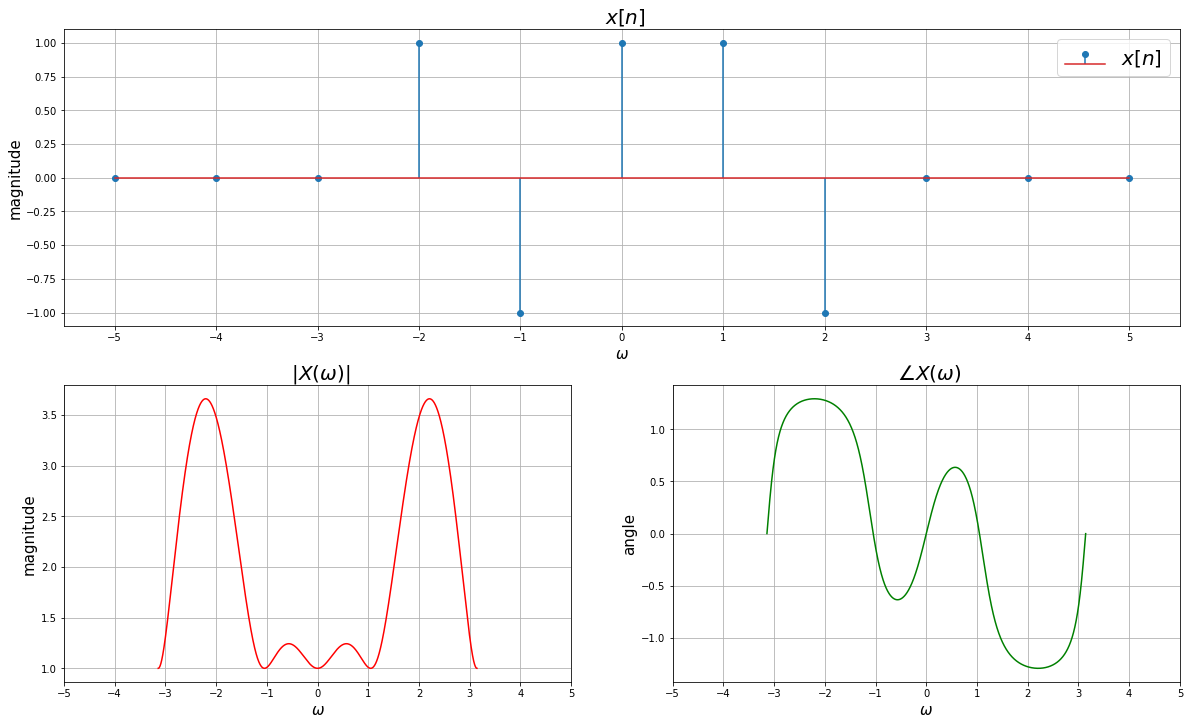

In [9]:
q4_n = np.arange(-5,6) # time axis
q4_x = np.array([0,0,0,1,-1,1,1,-1,0,0,0]) # given signal

q4_w, q4_rl, q4_im, q4_mag = dtft(q4_x, q4_n) # getting dtft 
q4_dtft = q4_rl + q4_im * 1j

#plotting
figq4 = plt.figure(figsize = (20,12)) 

figq4.add_subplot(211)
plt.stem(q4_n, q4_x, label = r'$x[n]$')
plt.xlabel(r'$\omega$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $ x[n]$' , size = 20)
plt.xticks(q4_n)
plt.legend(prop={'size': 20})
plt.grid()


figq4.add_subplot(223)
plt.plot(q4_w, np.abs(q4_dtft), 'r')
plt.xlabel(r'$\omega$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $|X(\omega)|$' , size = 20)
plt.xticks(q4_n)
plt.grid()

figq4.add_subplot(224)
plt.plot(q4_w, np.arctan2(q4_dtft.imag,q4_dtft.real), 'g')
plt.xlabel(r'$\omega$' , size = 15 )
plt.ylabel('angle' , size = 15 )
plt.title(r' $\angle X(\omega)$' , size = 20)
plt.xticks(q4_n)
plt.grid()


# Q5.) 
#### Given an LTI system with impulse response h[n] = u[n] and an input x[n] = $(0.8)^{n}u[n]$, compute the DTFT of the output $Y(e^{ jω})$ and its inverse DTFT y[n].

## a)

<ipython-input-8-1310e7cea806>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  x_n[i] = np.sum(x_w * np.exp(1j * xw * xn[i])) /(2*pi) * 0.001


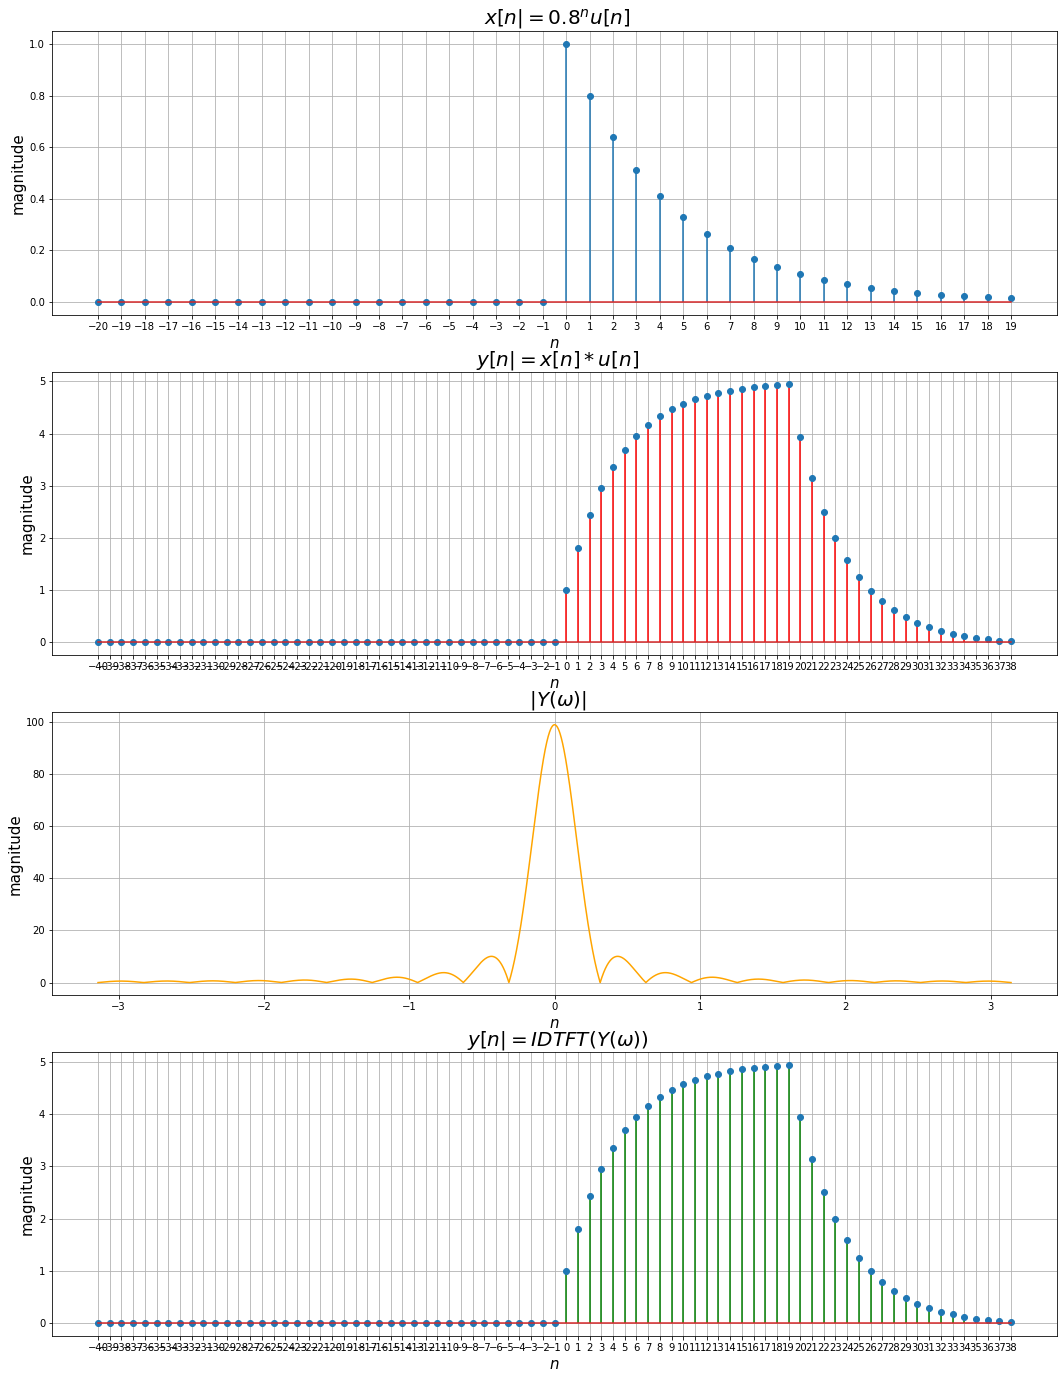

In [10]:
q5_n = np.arange(-20,20) # time axis

q5_u = np.zeros(len(q5_n)) # xero array to store unit step signal

for i in range(len(q5_n)): # getting unit step signal
    if q5_n[i]>=0:
        q5_u[i] = 1
        
q5_x = (0.8**q5_n) * q5_u # given signal

q5_y = np.convolve(q5_x, q5_u) # convolving unit step and given signal to get output
q5_n_y = np.arange(-40, 39) # time axis for output signal

q5_w, q5_rl, q5_im, q5_mag = dtft(q5_y, q5_n_y) # getting dtft of the o/p signal

q5_idtft = i_dtft(q5_rl + q5_im * 1j, q5_n_y) # getting inverse dtft of the o/p signal
 
#plotting
figq5 = plt.figure(figsize = (18,24))

figq5.add_subplot(411)
plt.stem(q5_n, q5_x)
plt.xlabel(r'$n$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $x[n| = 0.8^nu[n]$' , size = 20)
plt.xticks(q5_n)
plt.grid()

figq5.add_subplot(412)
plt.stem(q5_n_y, q5_y,'r')
plt.xlabel(r'$n$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $y[n| = x[n] * u[n]$' , size = 20)
plt.xticks(q5_n_y)
plt.grid()

figq5.add_subplot(413)
plt.plot(q5_w, q5_mag,'orange')
plt.xlabel(r'$n$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $|Y(\omega)|$' , size = 20)
plt.grid()

figq5.add_subplot(414)
plt.stem(q5_n_y, q5_idtft,'g')
plt.xlabel(r'$n$' , size = 15 )
plt.ylabel('magnitude' , size = 15 )
plt.title(r' $y[n| = IDTFT(Y(\omega))$' , size = 20)
plt.xticks(q5_n_y)
plt.grid()

# Q6.) 
#### Use the DFT to compute approximately the first 64 Fourier coefficients of the function
$$ f(t) = e^{-t^{2}/10}[sin2t + 2 cos4t + 0.4sint sin10t]$$
#### on the interval [0, 2π].
#### (a) Plot f(t)
#### (b) Compute the coefficients and plot them. Use the following transformation to compute DFT. Y = Wf

## a)

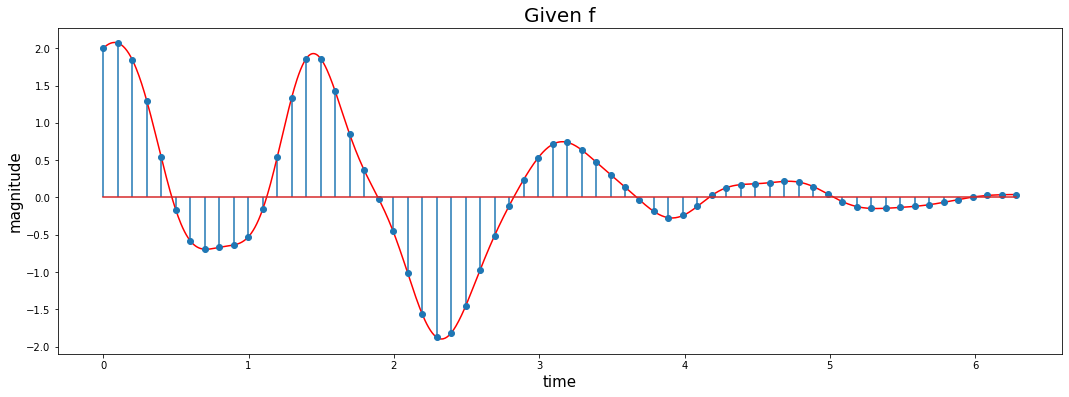

In [11]:
N = 64

def q6_func(t): # function to get givens signal
    return np.exp(-t**2 / 10) * ( np.sin(2*t) + 2*np.cos(4 * t) + 0.4 * np.sin(t) * np.sin(10 * t))

q6_t = np.linspace(0,2*pi, N) # sampled time axis
q6_t2 = np.linspace(0,2*pi, 1000) # continuous time axis

q6_f = q6_func(q6_t) # sampled signal
q6_f2 = q6_func(q6_t2) # continuous signal

#plotting

plt.figure(figsize = (18,6))
plt.plot(q6_t2, q6_f2, 'r')
plt.stem(q6_t, q6_f)

plt.xlabel('time', size = 15)
plt.ylabel('magnitude', size = 15)
plt.title('Given f', size = 20)
plt.show()

## b) 

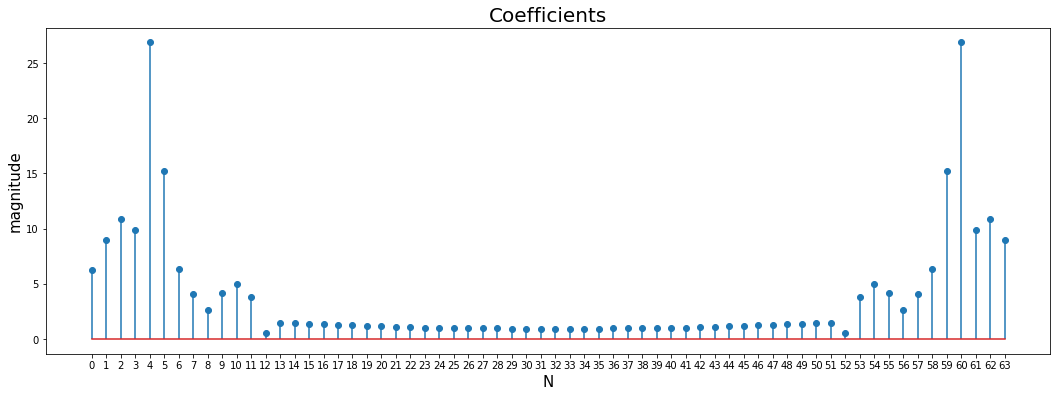

In [12]:
W = np.zeros((N,N), dtype = complex) # zero complex array

q6_w = np.exp(-2j * pi / N) # value of w

for i in range(N): # creating matrix to calculate DFT
    for j in range(N):
        W[i][j] = q6_w**(i * j)
        
        
dft6 = np.abs(np.matmul(W,q6_f)) # multiplying the matrix with above sampled signal to get dtfs coeff using DFT

# Plotting
plt.figure(figsize = (18,6))
plt.stem(np.arange(N), dft6)

plt.xlabel('N', size = 15)
plt.ylabel('magnitude', size = 15)
plt.title('Coefficients', size = 20)
plt.xticks(np.arange(N))
plt.show()

# Q7.) 
#### x[n] is a discrete time sequence given by:
$$ x[n] = (\frac{-1}{3})^{n} u[n] - (\frac{1}{2})^{n} u[-n-1]$$
#### where n is the discrete time sequence and u[n] is the unit step sequence.
#### (a) Find the Z-transform of x[n] denoted by X(z) (calculate manually). Plot x[n], the magnitude and phase spectra of X(z) on 3 different subplots. Also, visualize the real and imaginary parts of X(z) on a 3D plot.
#### (b) Find the Region of Convergence (ROC) of X(z) (calculate manually). Plot and visualize the poles, zeros and ROC of X(z) on a single subplot (for plotting ROC, draw circles and shade the appropriate region).

In [13]:
def z_transform(f,x): # function to get z transform on unit circle 
    xw = np.arange(-pi,pi,0.001) # w axis
    z_trans = np.zeros(len(xw),dtype = complex) # zero complex array to store z transform
    z = np.exp(xw*1j)
    
    for i in range(len(xw)):
        z_trans[i] = np.sum( (z[i]**(-1 * x)) * f) # z transform
        
    return xw, np.abs(z_trans), np.arctan(z_trans.imag / z_trans.real), z_trans

## a)

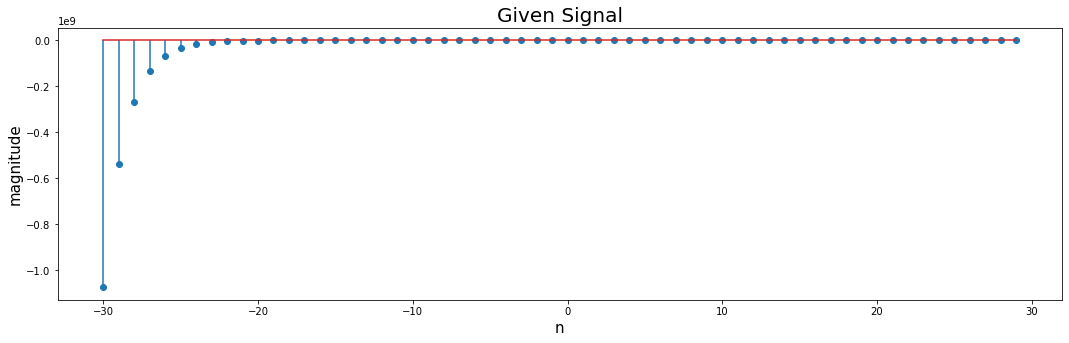

In [14]:
q7_n = np.arange(-30,30) # time axis 

q7_un1 = np.zeros_like(q7_n)
q7_un2 = np.zeros_like(q7_n)

for i in range(len(q7_n)):
    if q7_n[i]>=0:
        q7_un1[i] = 1
    if (-q7_n[i] - 1)>=0:
        q7_un2[i] = 1
        

q7_x = (((-1/3)**q7_n) * q7_un1) - (((0.5)**(q7_n)) * q7_un2) # given signal

#plotting

plt.figure(figsize = (18,5))
plt.stem(q7_n, q7_x)
plt.xlabel('n', size = 15)
plt.ylabel('magnitude', size = 15)
plt.title('Given Signal', size = 20)
plt.show()

### $ \color{red} { \text{The given sequence is unbounded, hence its DTFT or Z-transform at unit circle is also unbounded as show in figures below} }$

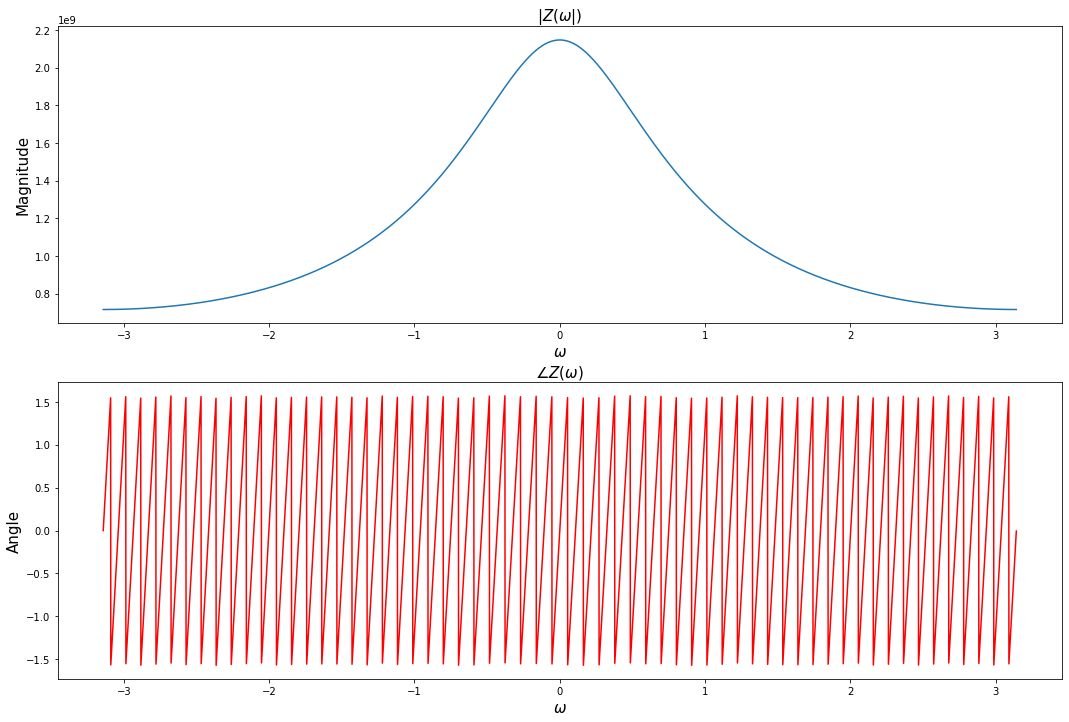

In [15]:
zz = z_transform(q7_x,q7_n) # getting z transform of the above signal

# Plotting

figq7a = plt.figure(figsize = (18,12))

figq7a.add_subplot(211)
plt.plot(zz[0], zz[1])
plt.xlabel(r'$\omega$', size = 15)
plt.ylabel('Magnitude', size = 15)
plt.title(r'$|Z(\omega|)$', size = 15)


figq7a.add_subplot(212)
plt.plot(zz[0], zz[2],'r')
plt.xlabel(r'$\omega$', size = 15)
plt.ylabel(r'Angle', size = 15)
plt.title(r'$\angle Z(\omega)$', size = 15)
plt.show()

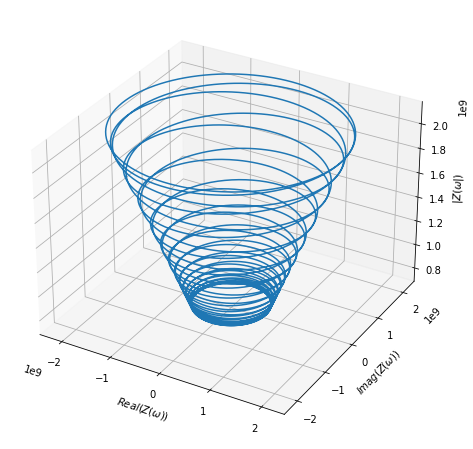

In [16]:
from mpl_toolkits import mplot3d

plt.figure(figsize = (8,8))
ax7 = plt.axes(projection='3d')
ax7.plot(zz[3].real, zz[3].imag, zz[1])
ax7.set_xlabel(r'$Real(Z(\omega))$', weight = 'bold')
ax7.set_ylabel(r'$Imag(Z(\omega))$', weight = 'bold')
ax7.set_zlabel(r'$|Z(\omega|)$', weight = 'bold')
plt.show()

## b)

### Z-transform of the given signal
#### $$ \frac{2 - \frac{1}{6}z^{-1}}{(1+\frac{1}{3}z^{-1} )(1-\frac{1}{2}z^{-1})} ; ROC:\frac{1}{3}<|z|<\frac{1}{2} $$

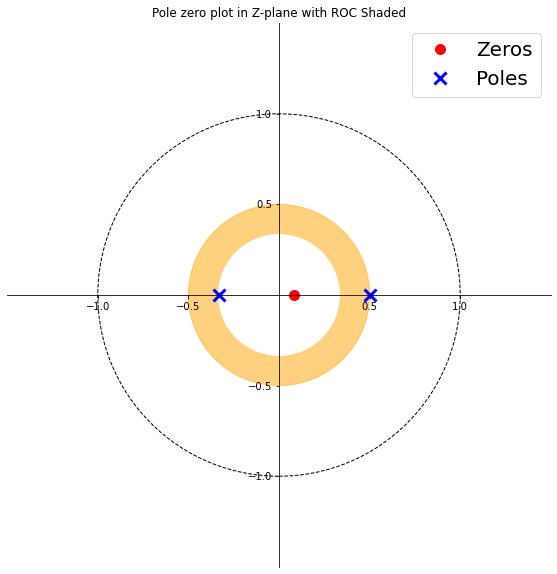

Zeros : [0.08333333]
Poles : [ 0.5        -0.33333333]


In [17]:
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane(b,a,filename=None): # function for z plane

    # get a figure/plot
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'ro', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='r', markerfacecolor='r',label = 'Zeros')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='b', markerfacecolor='b',label = 'Poles')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        c0 = plt.Circle( (0, 0 ),1/12 ,fill = False ,ls = '--')
        c1 = plt.Circle( (0, 0 ),1/3 ,fill = True ,  color = 'white' , animated = True ,aa = 'hu')
        c2 = plt.Circle( (0, 0 ),1/2 ,fill = True , color =  'orange', alpha = 0.5 )
        ax.add_patch(c2)
        #ax.add_artist(c0)
        ax.add_artist(c1)
        ax.set_aspect(1)
        plt.title('Pole zero plot in Z-plane with ROC Shaded')
        plt.legend(prop = {'size':20})
        plt.show()
    else:
        plt.savefig(filename)
    return z, p, k

q7_b = np.array([2, -1/6]) # numerator
q7_a = np.array([1, -1/6, -1/6]) # denominator

q7_zeros, q7_poles, q7_k = zplane(q7_b,q7_a) # getting zeros, poles and zplane with roc


print(f'Zeros : {q7_zeros}')
print(f'Poles : {q7_poles}')




# Q8.)
#### For the z-transform, H(z), is given by:
$$ H(z) = \frac{18z^{3}}{18z^{3}+3z^{2}-4z-1}$$
#### (a) Determine and plot the zeros and poles of H(z). Also, plot its magnitude and phase spectra.
#### (b) Using partial fraction expansion, determine the ROC and inverse z-transform of H(z).

## a)

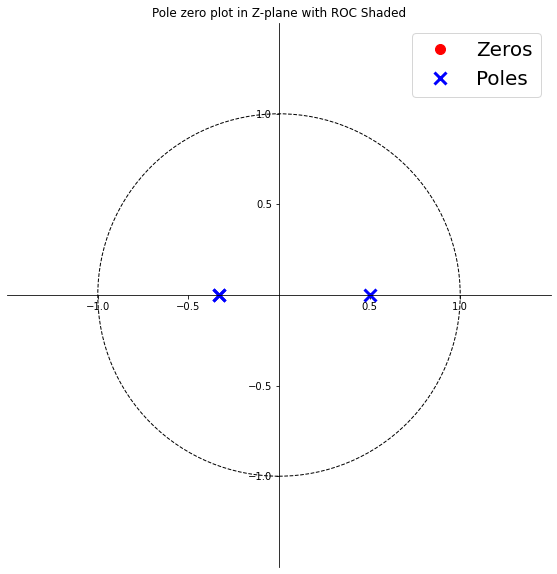

Zeros : []
Poles : [ 0.5  +0.j -0.333+0.j -0.333-0.j]


In [18]:
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane8(b,a,filename=None): # z plane

    # get a figure/plot
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'ro', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='r', markerfacecolor='r',label = 'Zeros')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='b', markerfacecolor='b',label = 'Poles')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        c0 = plt.Circle( (0, 0 ),1/12 ,fill = False ,ls = '--')
#         c1 = plt.Circle( (0, 0 ),1/3 ,fill = True ,  color = 'white' , animated = True ,aa = 'hu')
#         c2 = plt.Circle( (0, 0 ),1/2 ,fill = True , color =  'orange', alpha = 0.5 )
#         ax.add_patch(c2)
        #ax.add_artist(c0)
#         ax.add_artist(c1)
        ax.set_aspect(1)
        plt.title('Pole zero plot in Z-plane with ROC Shaded')
        plt.legend(prop = {'size':20})
        plt.show()
    else:
        plt.savefig(filename)
    return z, p, k



q8_b = np.array([18]) # numerator
q8_a = np.array([18, 3, -4, -1]) # denominator

q8_zeros, q8_poles, q8_k = zplane8(q8_b,q8_a) # getting zeros, poles and zplane

print(f'Zeros : {q8_zeros}')
print(f'Poles : {np.round(q8_poles,3)}')

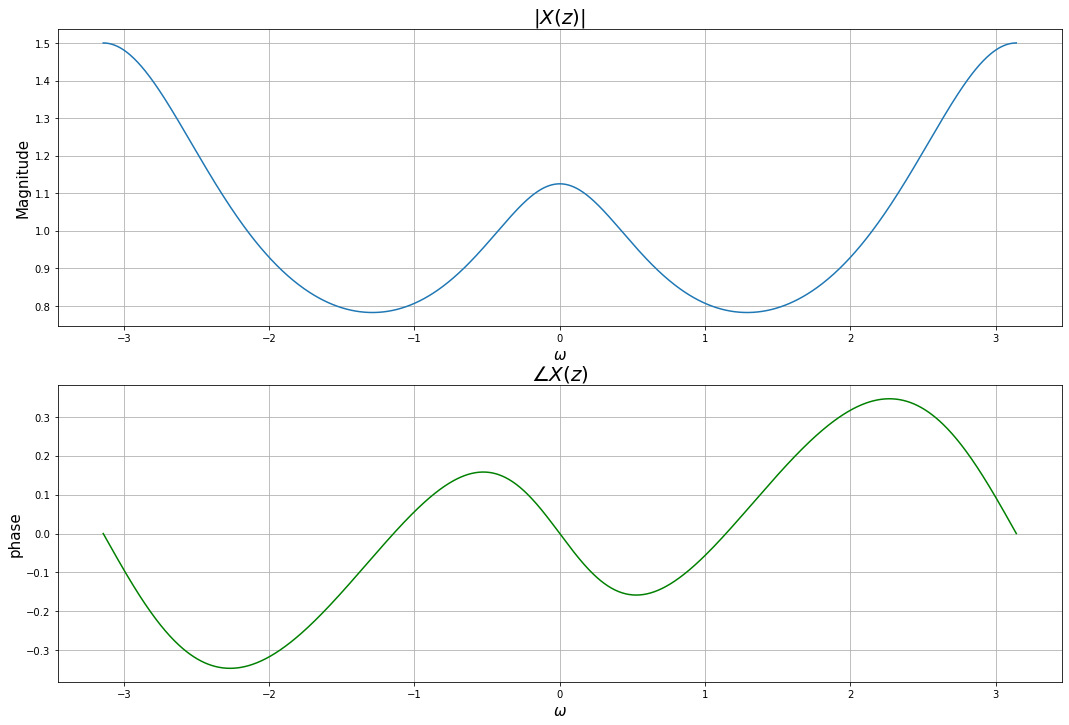

In [19]:
import cmath

q8_z = np.linspace(-pi,pi,1000) # w axis

def q8_ztrans(zz):
    return 18*np.exp(1j*3*zz)/(18*np.exp(1j*3*zz)+3*np.exp(1j*2*zz)-4*np.exp(1j*zz)-1)



#plotting

figq8a = plt.figure(figsize = (18,12))

figq8a.add_subplot(211)
plt.plot(q8_z,abs(q8_ztrans(q8_z))) # getting magnitue of ztransform and plotting
plt.title(r'$\|X(z)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Magnitude', size = 15 )
plt.grid()


phase=list(map(lambda x: cmath.phase(x) , q8_ztrans(q8_z))) # getting phase

figq8a.add_subplot(212)

plt.plot(q8_z,phase,'g')
plt.title(r'$\angle X(z)$' , size= 20)
plt.xlabel('$\omega$' , size = 15)
plt.ylabel('phase', size = 15 )
plt.grid()
plt.show()

## b)

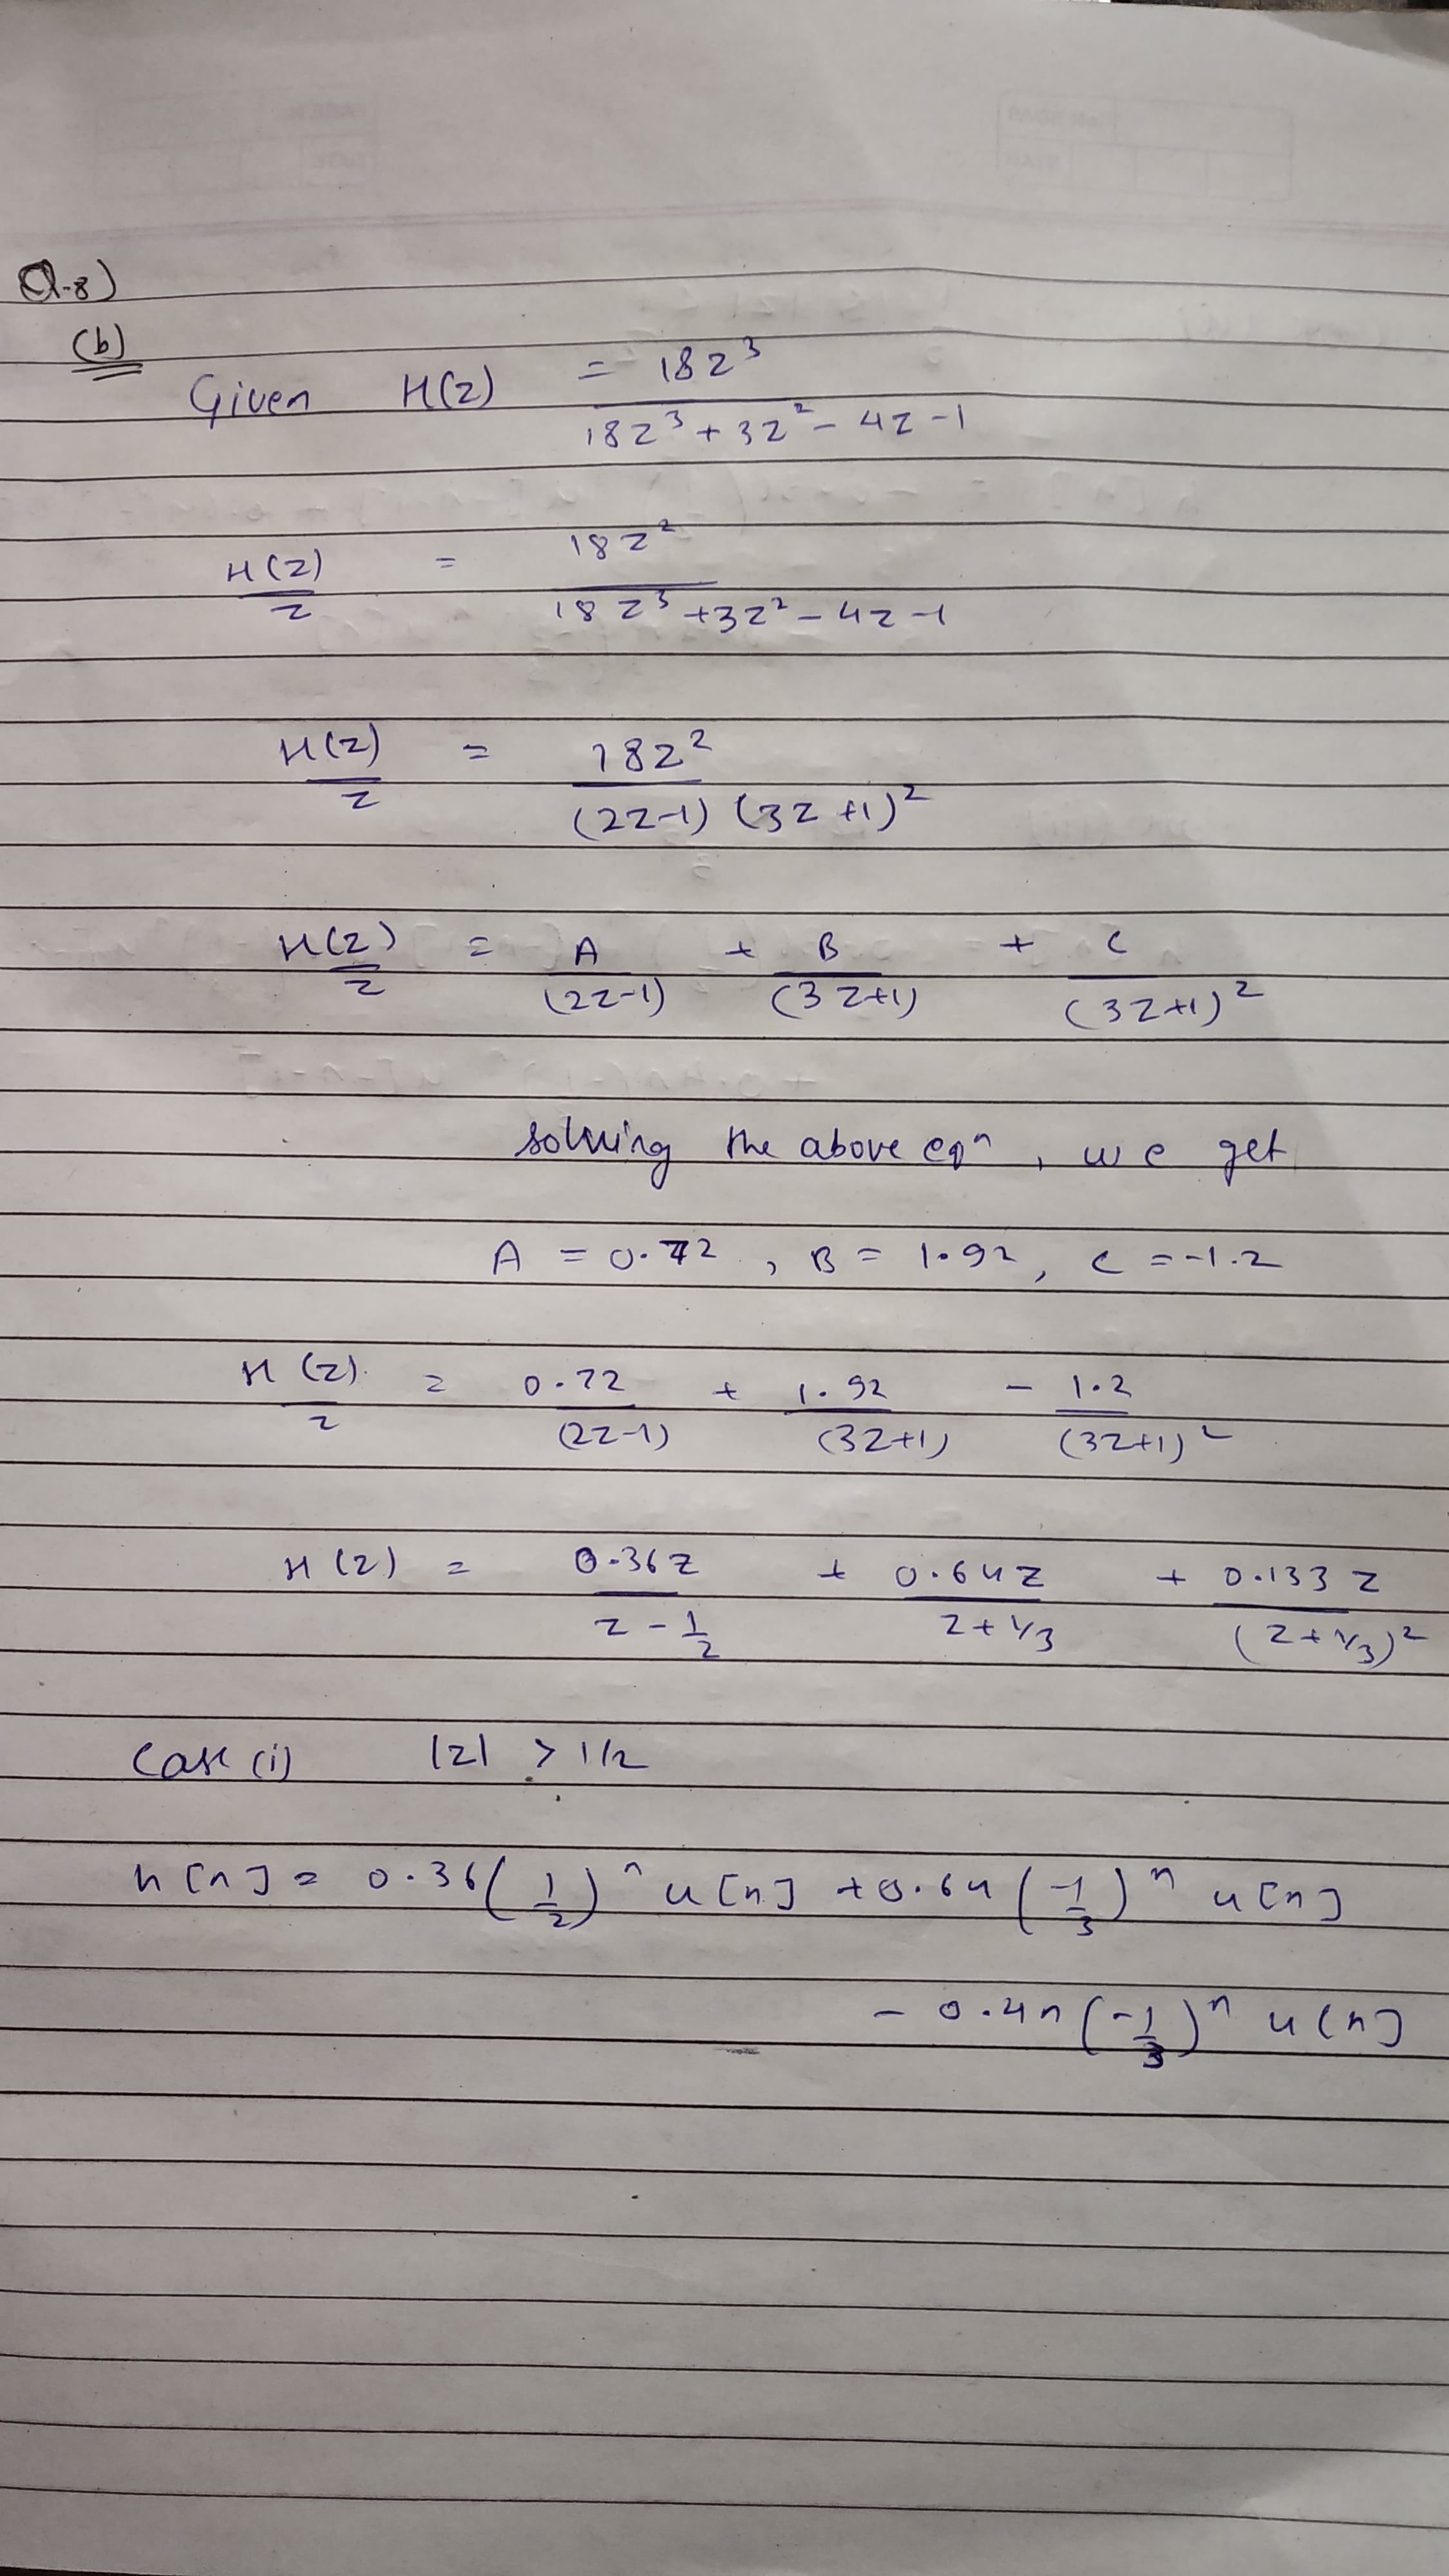

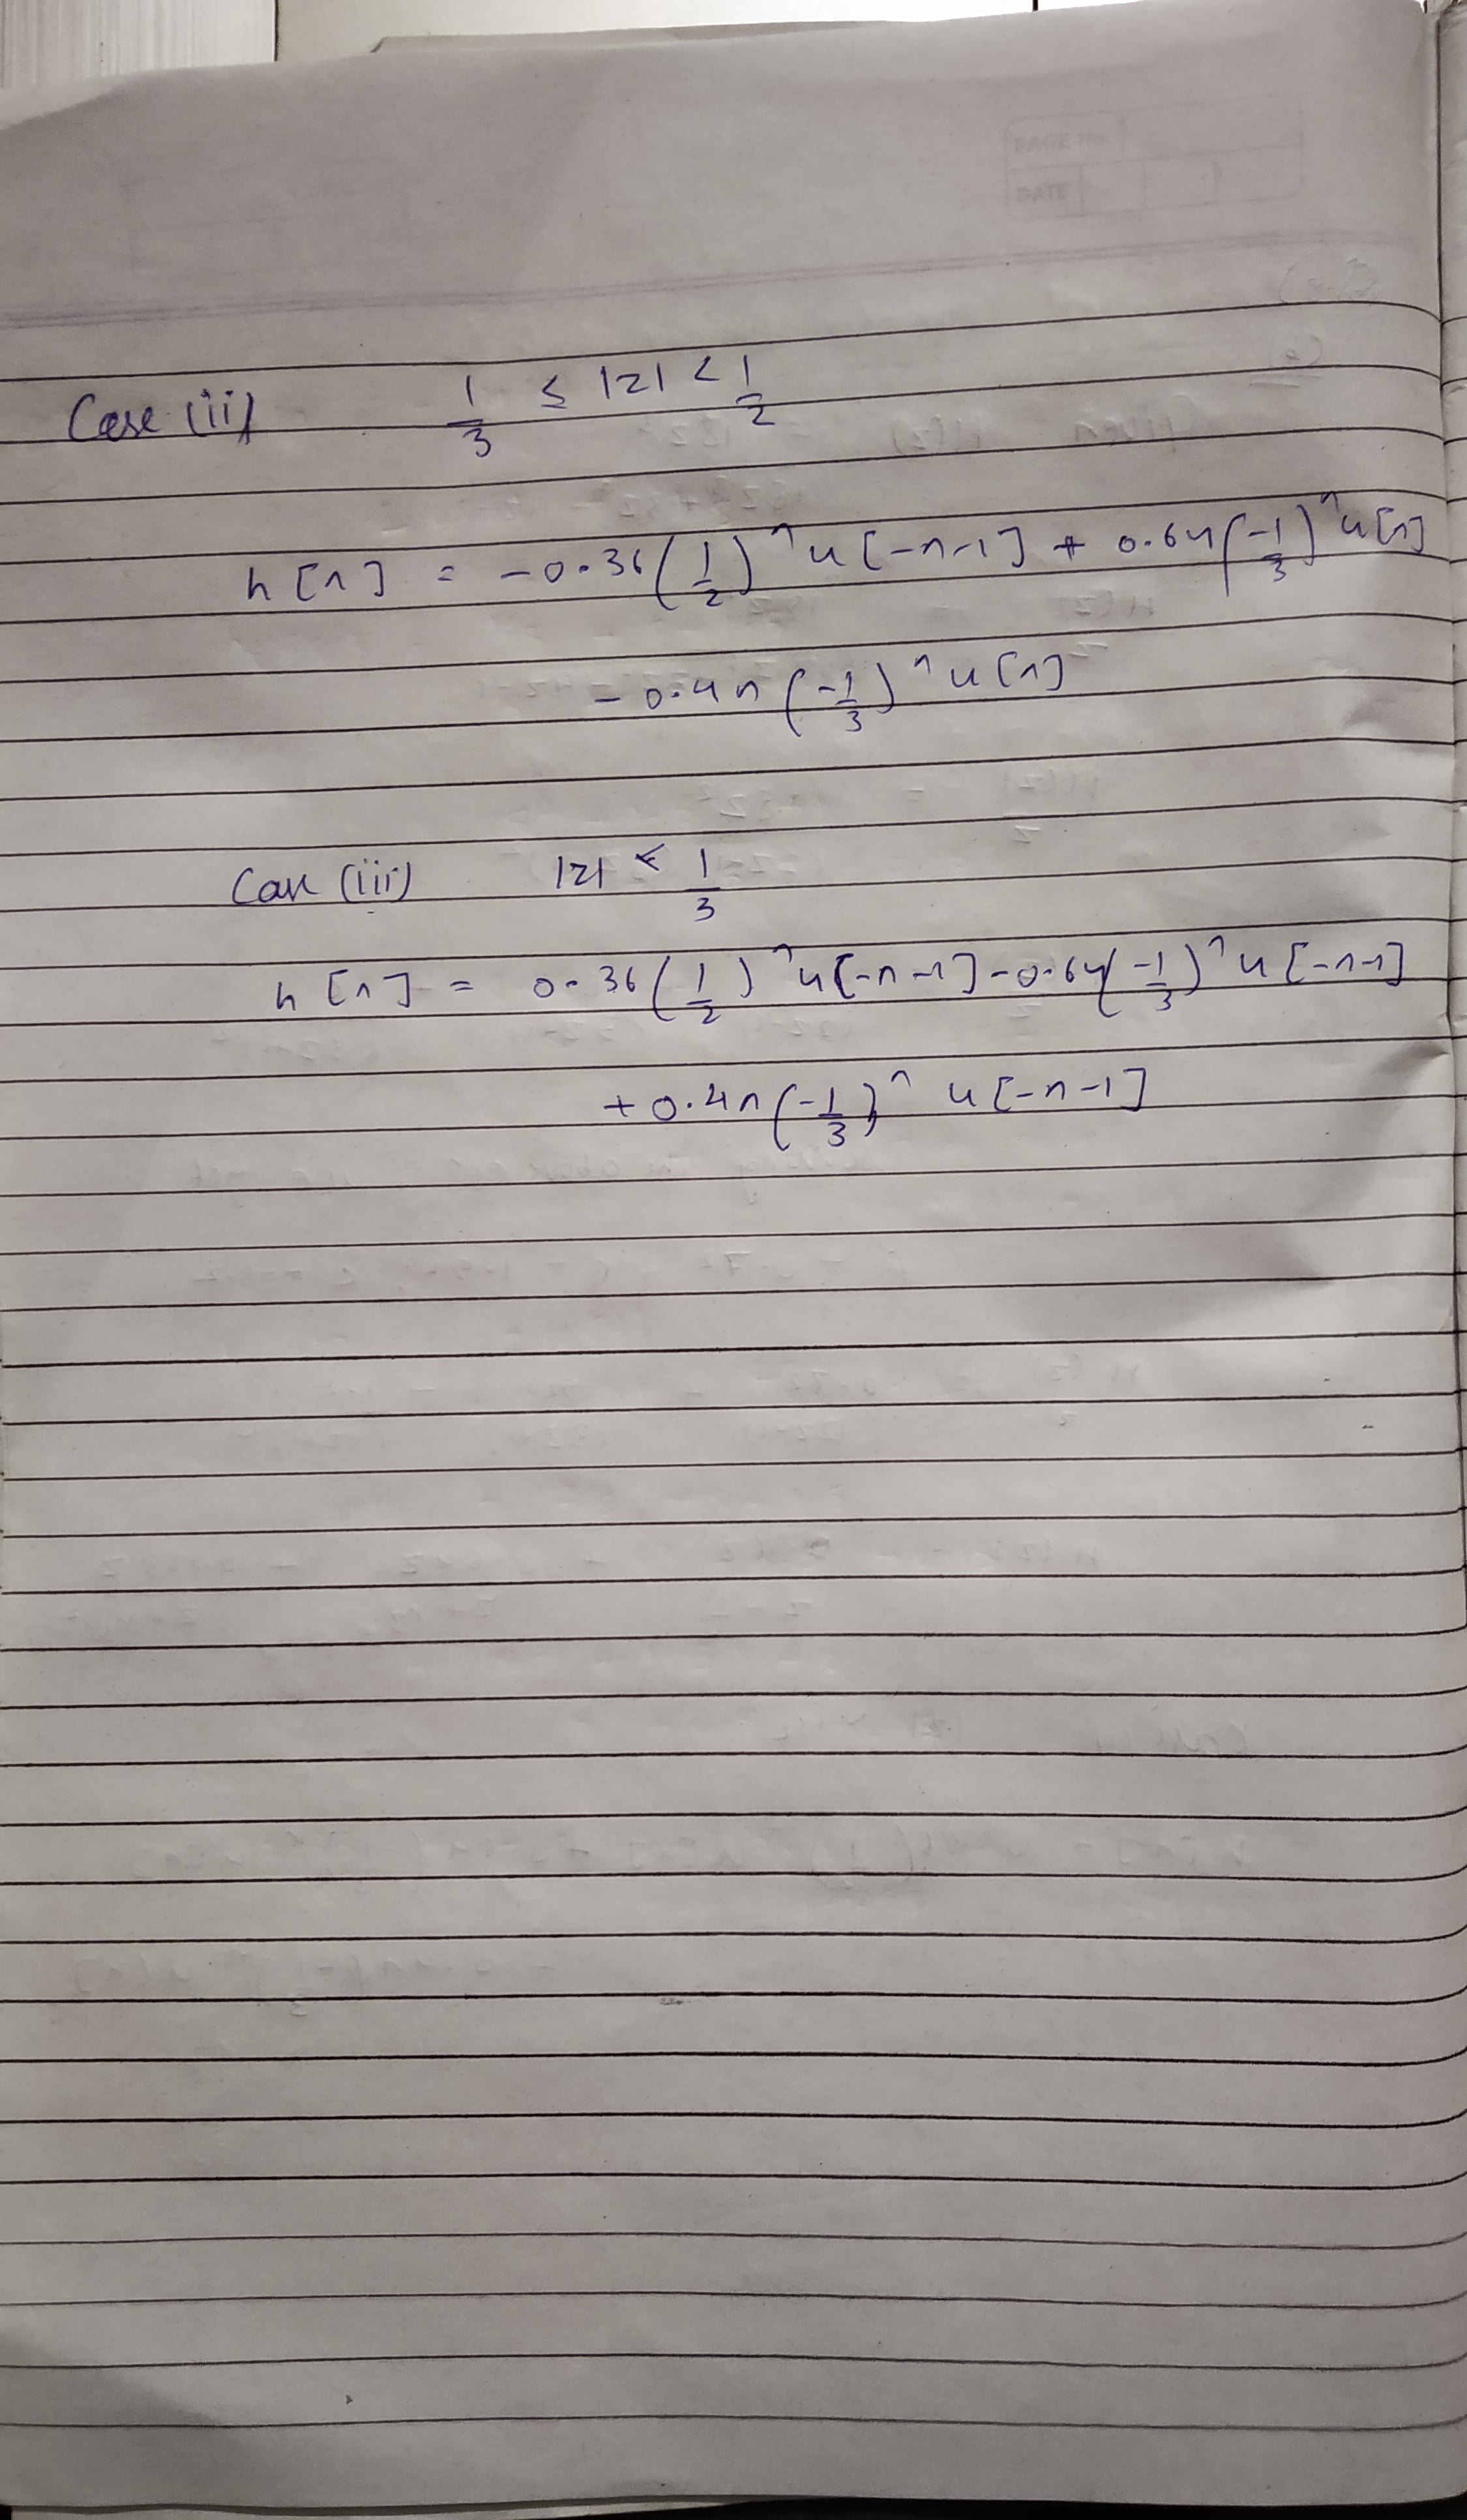

# Q9.)
#### One of the uses of the Laplace transform is the solution of differential equations.
#### (a) Suppose you are given the ordinary differential equation that represents an LTI system,
####                       $        y^{(2)}(t) + 0.5y^{(1)}(t) + 0.15y(t) = x(t), t ≥ 0 $
#### where y(t) is the output and x(t) is the input of the system, y (1)(t) and y (2)(t) are first and second order derivatives with respect to t. The input is causal, i.e., x(t) = 0, t < 0. What should be the initial conditions for the system to be LTI? Find Y (s) for those initial conditions.
#### (b) If y (1)(0) = 1 and y(0) = 1 are the initial conditions for the above ordinary differential equation, find Y (s). If the input to the system is doubled, i.e., the input is 2x(t), is Y (s) doubled? Is the system linear?
#### (c) Find the solutions of the ordinary differential equation when the input is u(t) and 2u(t), with the initial conditions as given above. Compare the solutions and verify your response in (b).

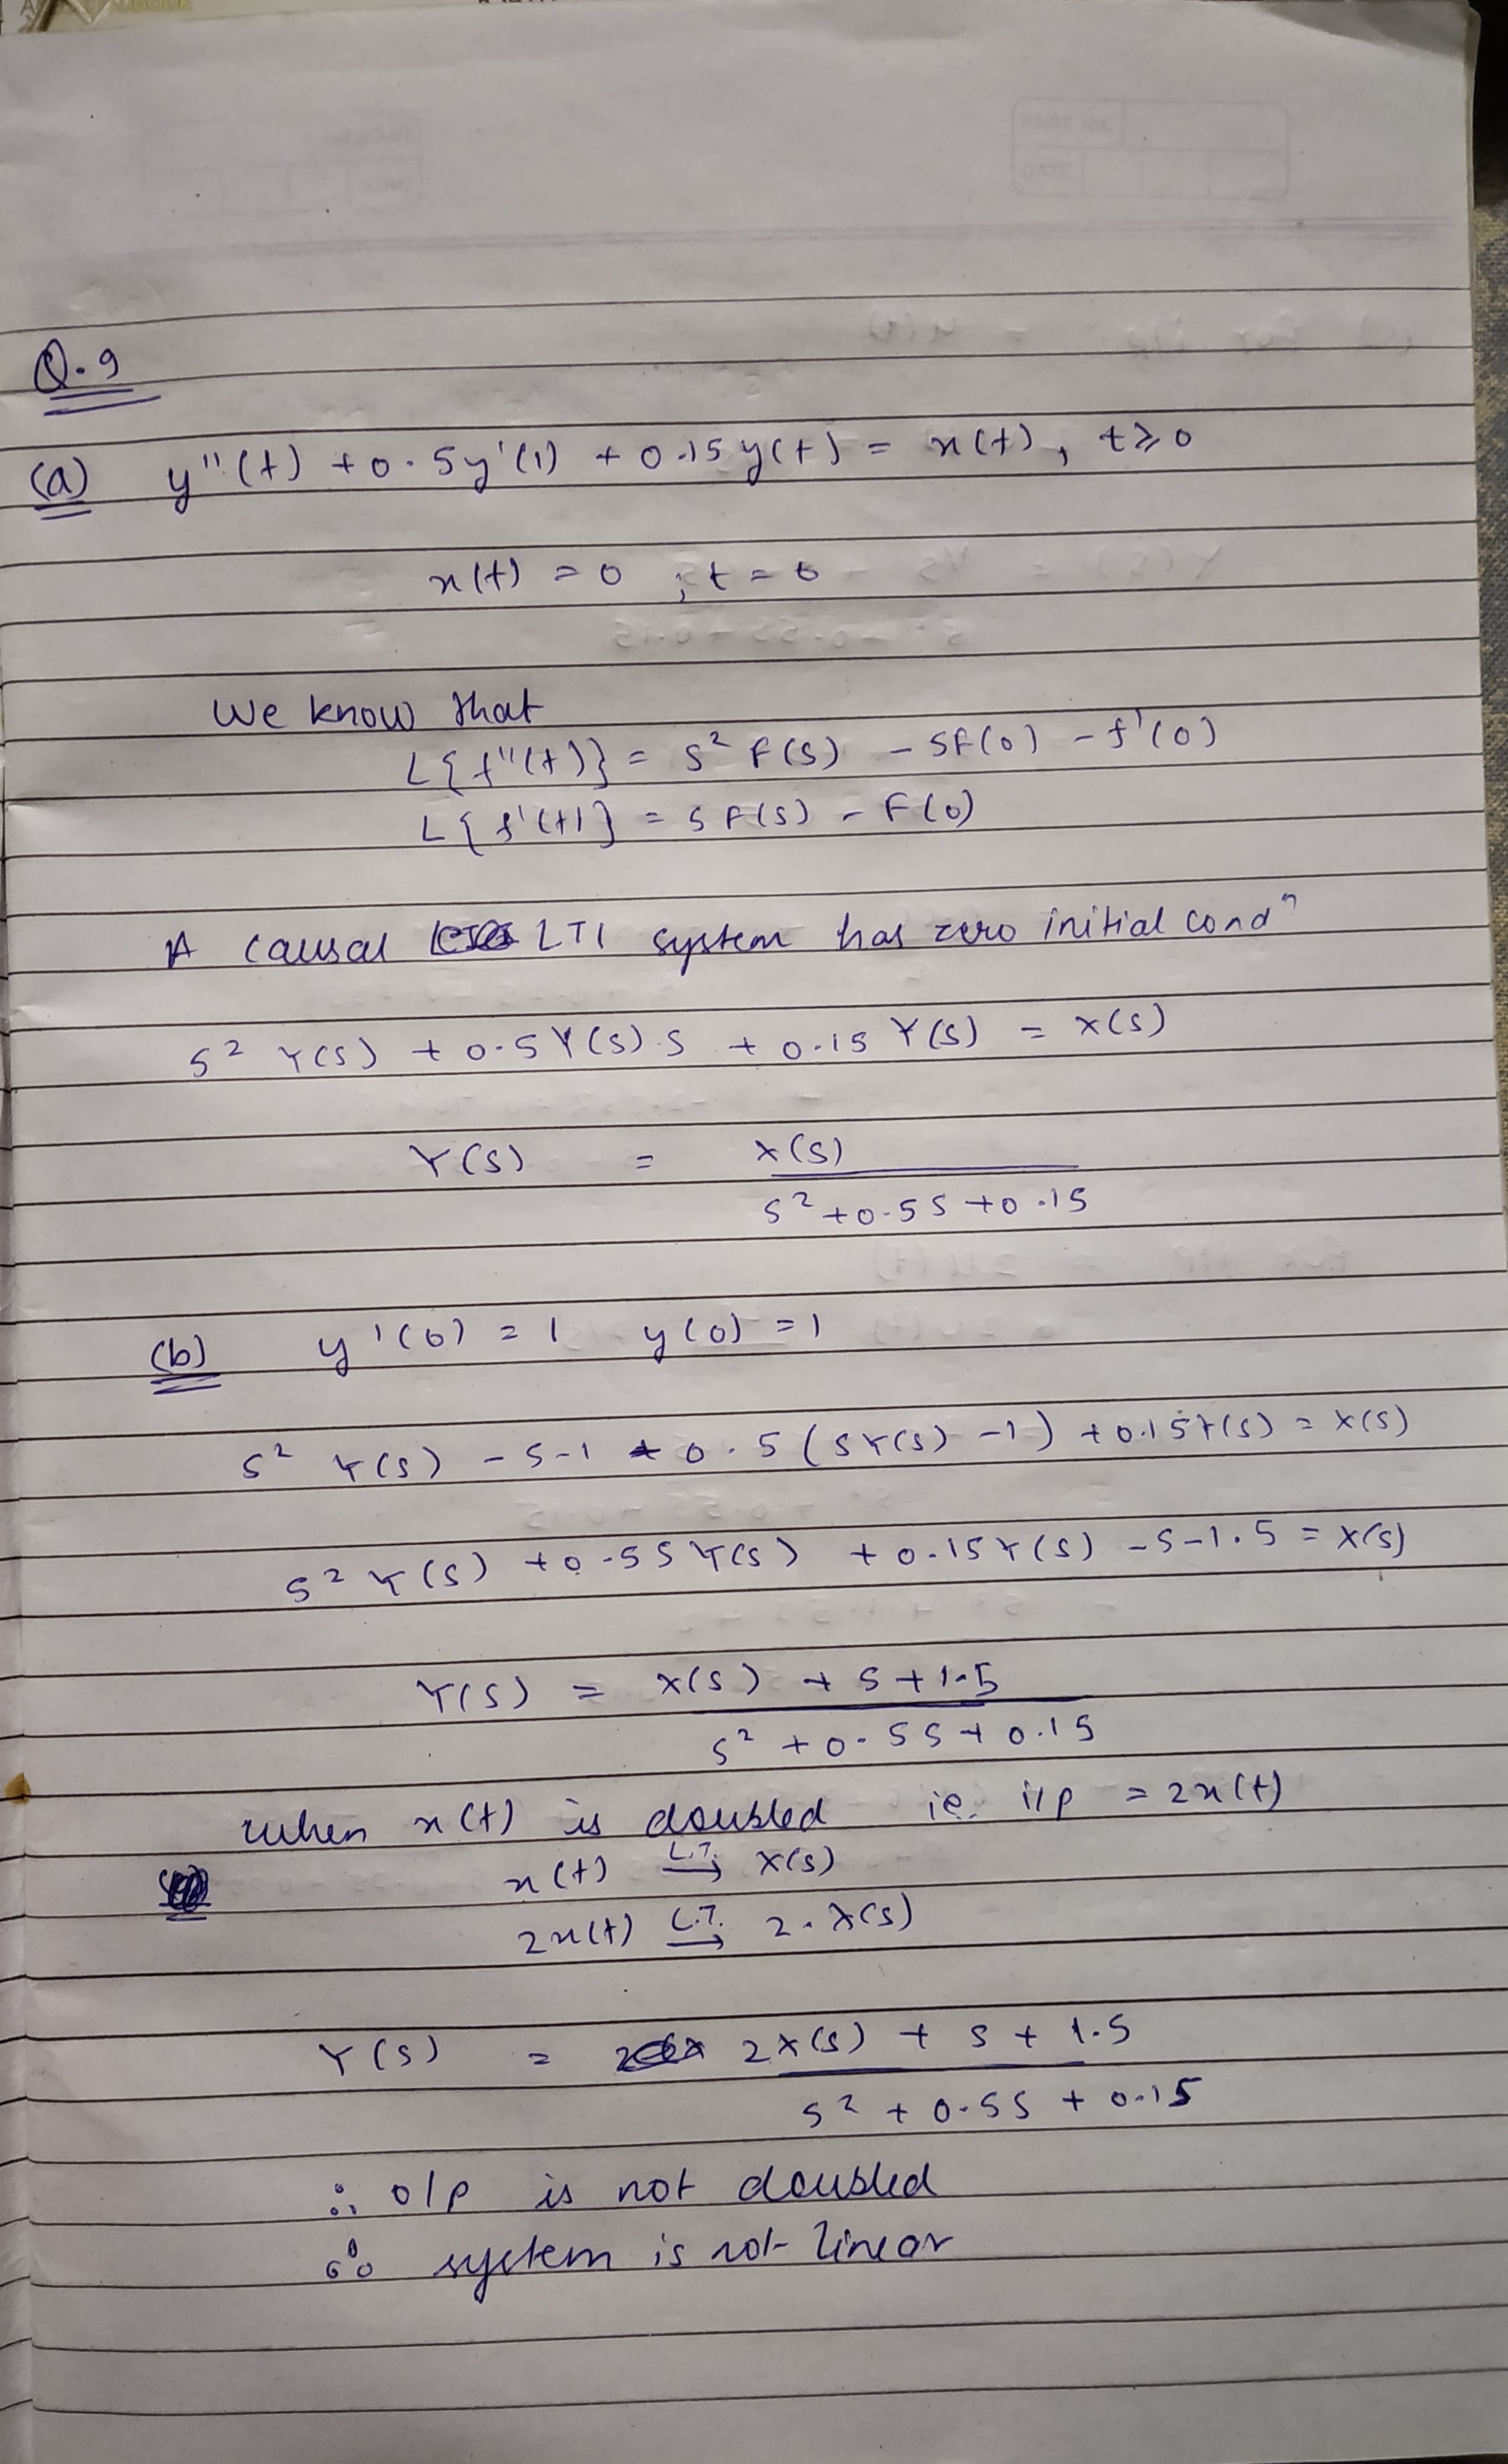

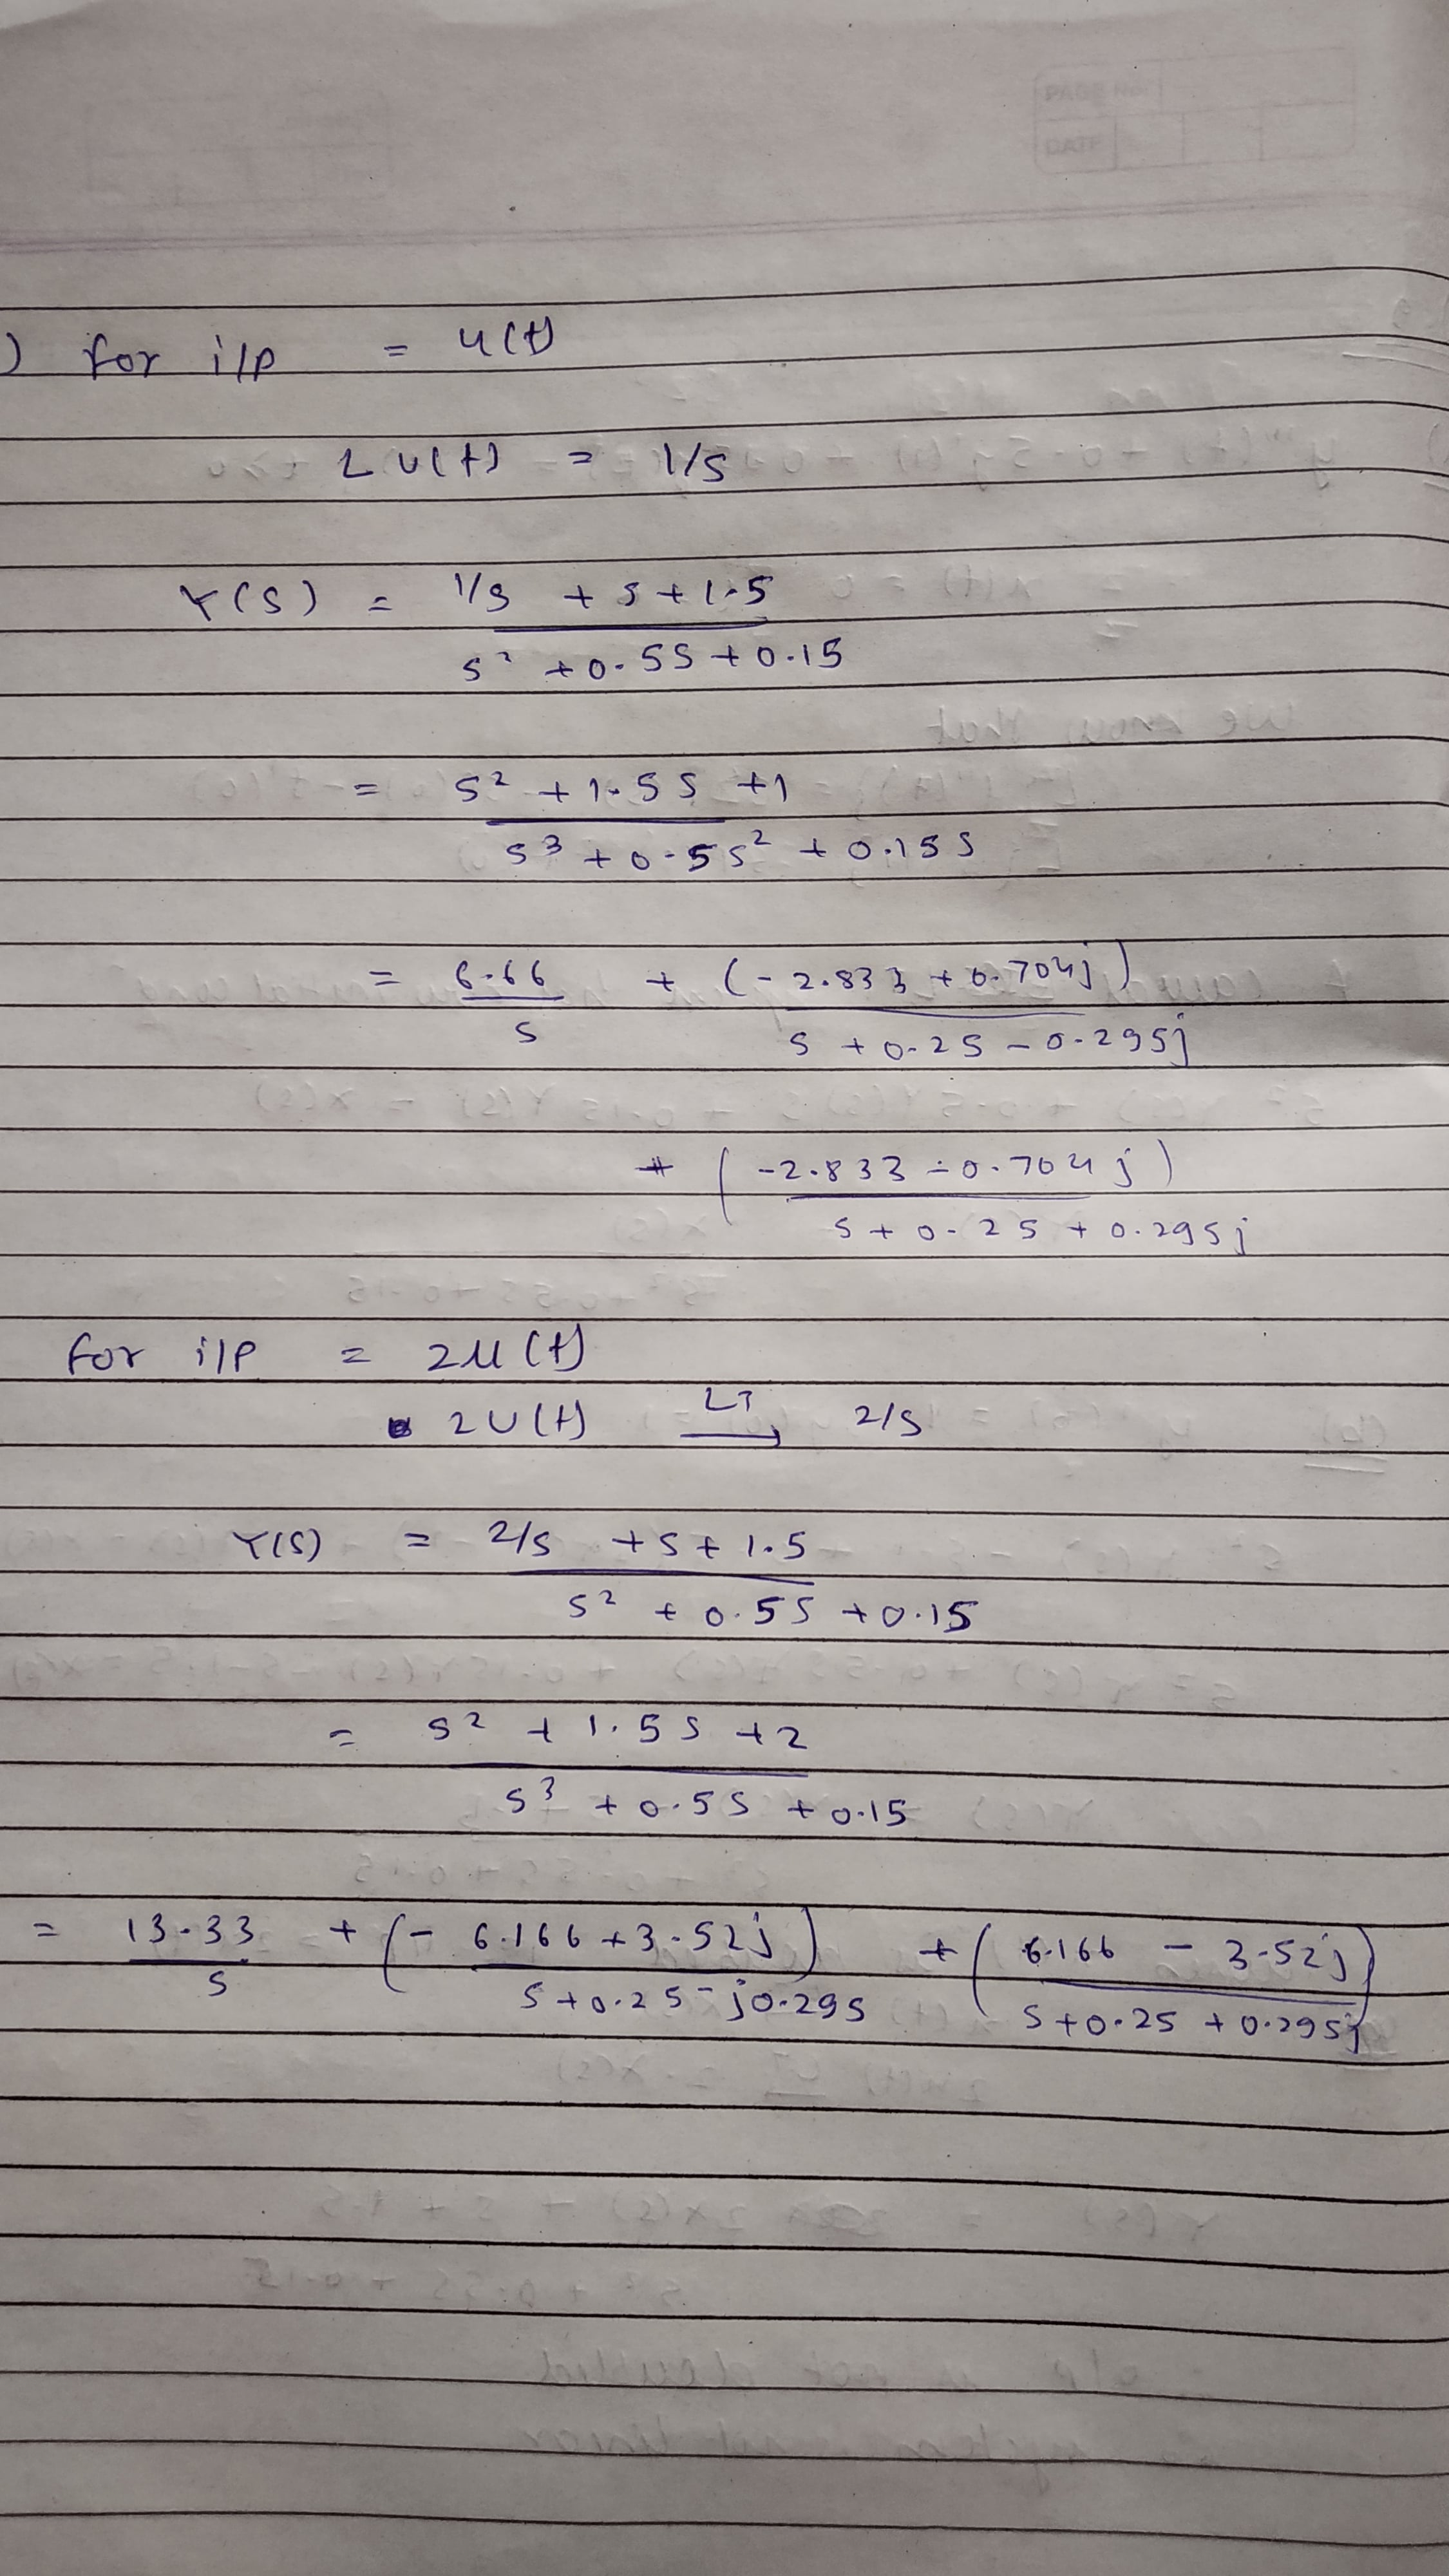

# Q10.)
#### We are given the following five facts about a real signal x(t) with Laplace transform X(s):
#### • X(s) has exactly two pole
#### • X(s) has no zeros in the finite s-plane.
#### • X(s) has a pole at s = -1 + j.
#### • $e^{2t}x(t) $is not absolutely integrable.
#### • X(0) = 8.
#### Determine X(s) and specify its region of convergence. Also plot its poles.


######    $ X(s) = \frac{16}{s^{2}+2s+2}$;ROC is Re(s) > -1 

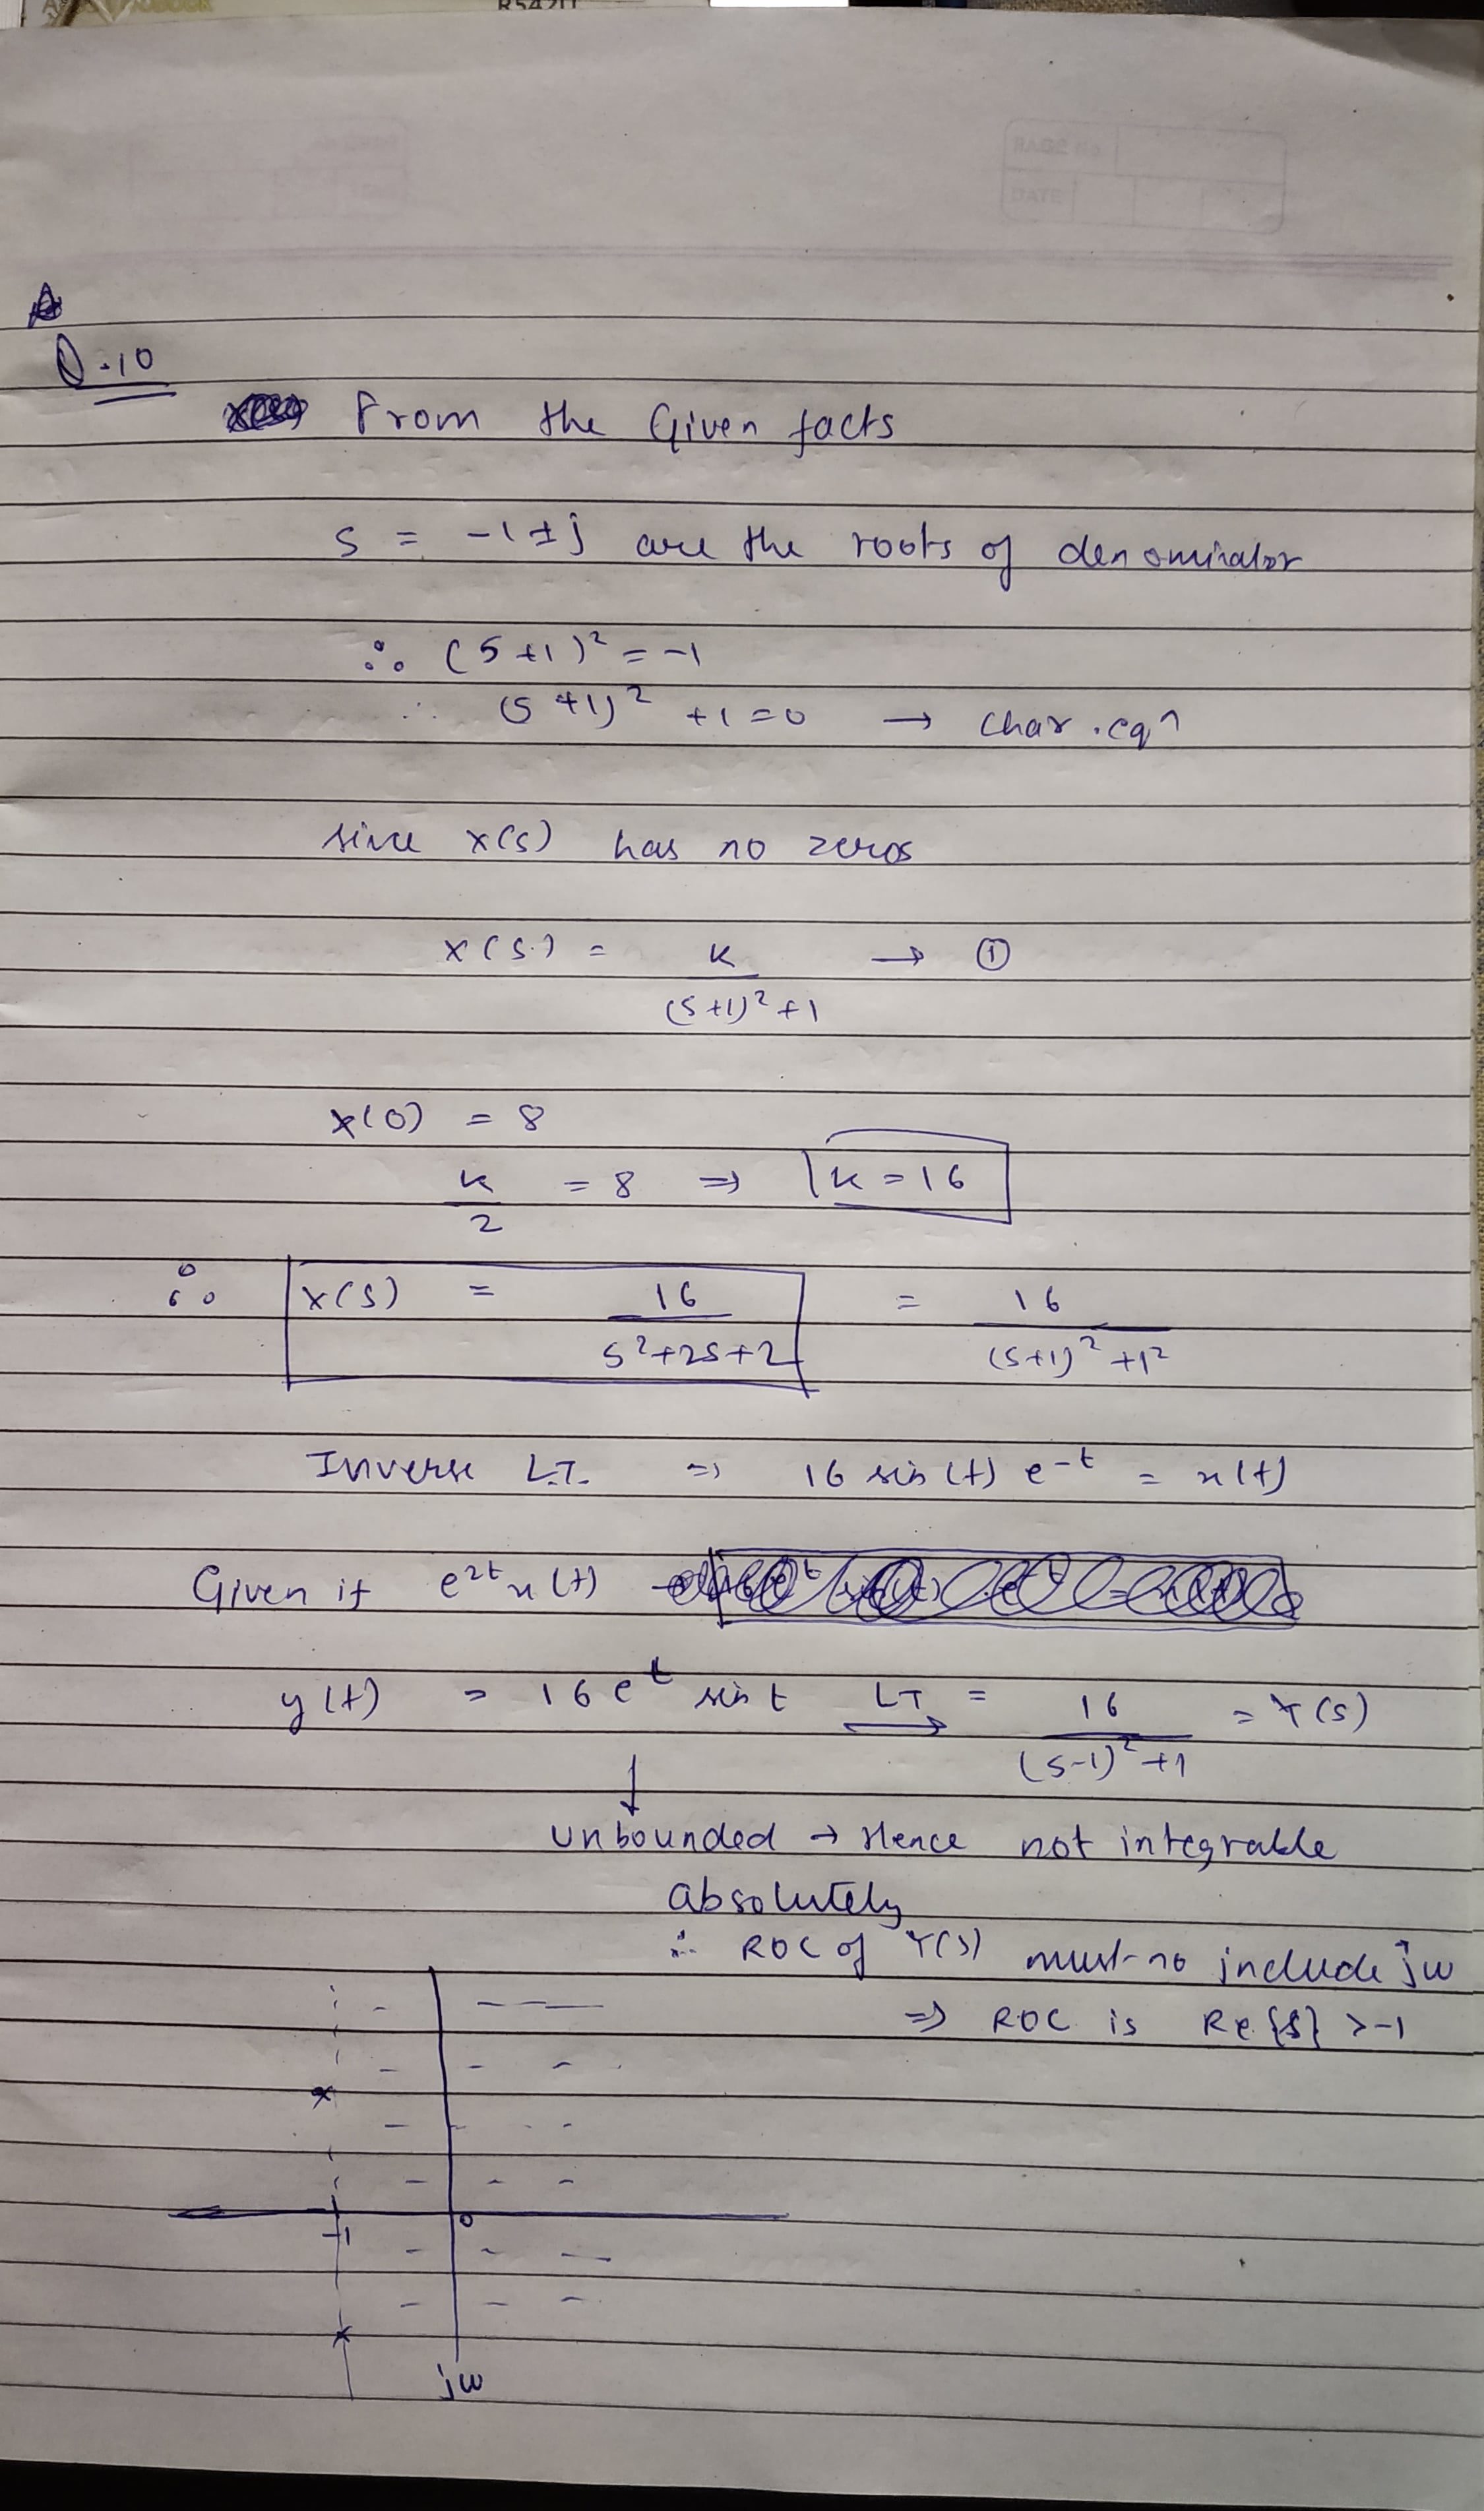

In [20]:
# getting poles

q10_den = [1,2,2]
q10_poles = np.roots(q10_den)

print(f'The poles of given Transfer Function is:')
q10_poles

The poles of given Transfer Function is:


array([-1.+1.j, -1.-1.j])

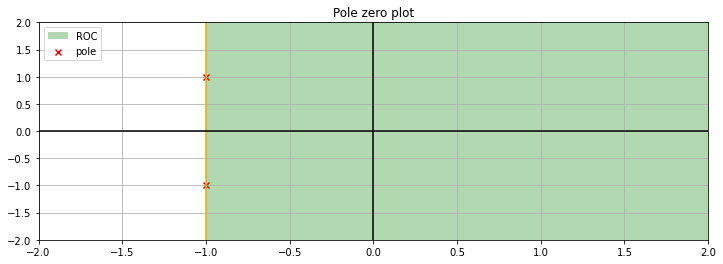

In [21]:
plt.figure(figsize=(12,4))
plt.scatter(q10_poles.real,q10_poles.imag,marker="x",label='pole',c='r')
plt.title('Pole zero plot')
plt.grid()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axvline(-1,c='orange')
plt.axvline(0,c='black')
plt.axhline(0,c='black')
plt.axvspan(-1,2, color='g', alpha=0.3, lw=0,label='ROC')
plt.legend()
plt.show()